# Facebook Commenter Analytics (Commenter)
----
In this notebook, we will explore user that has comment many comment and see their behavior.

In [2]:
import pandas as pd
import numpy as np
from pythainlp.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
mpl.rc('font',family='JasmineUPC')
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15) 
%matplotlib inline

In [3]:
import plotly 
plotly.tools.set_credentials_file(username='TeerapatChaiwachirasak', api_key='RMqZv6z9pSmGeRafgNnS')
import plotly.plotly as py
import plotly.graph_objs as go

In [4]:
#Test reading from .tsv
commentDf = pd.read_csv('../dataset/facebook_comment.tsv',sep ='\t')
commentDf['message'] = np.nan_to_num(commentDf['message'])
commentDf = commentDf[['commenter_name','created_time','like_count','message','service']]
commentDf['created_date'] = pd.to_datetime(commentDf['created_time'], format='%Y-%m-%d %H:%M:%S.%f')
commentDf['created_date_format'] = commentDf['created_date'].apply(lambda x: x.replace(hour=0, minute=0, second=0, microsecond=0))
commentDf['service'][commentDf['service']==True] = 'TRUE'
commentDf.head()

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,commenter_name,created_time,like_count,message,service,created_date,created_date_format
0,Nui Worabut,2016-06-01 12:53:00,1.0,ใช้โปรเสริม net non..9 gb ใช้หมดลดความเร็วไม่...,DTAC,2016-06-01 12:53:00,2016-06-01
1,Chandratithaya Je-u,2016-06-02 17:17:32,0.0,ใช้ดีแทค แล้วปวดใจจริงๆ สัญญานขาดหาย อินเตอร์เ...,DTAC,2016-06-02 17:17:32,2016-06-02
2,Hataichanok Maklamai,2016-06-02 07:51:45,0.0,ส่งขอมูลไปทาง ib แล้วนะคะ รบกวนตอบด้วยคะ ส่งไป...,DTAC,2016-06-02 07:51:45,2016-06-02
3,Nattapong Wongsa,2016-06-02 15:43:53,1.0,อะไรนี้...ไม่เปิดให้เติมเกมส์ใช้ปะ จะได้เลิกใช้,DTAC,2016-06-02 15:43:53,2016-06-02
4,Jitsak Sisawad,2016-06-02 15:09:06,0.0,ห่วยแตกไม่เคยแจ้งข่าวสารให้ลูก อยู่ๆก้มาเก็บค่...,DTAC,2016-06-02 15:09:06,2016-06-02


## Here we are going to look at top commenters (commenter whose comment a lot)
---------------------------

In [5]:
commentDf['commenter_name'].value_counts().head(10)

ธนิด ภัทรกิตติ      1830
อนันต์ ด้า           548
TrueMove H           399
AIS                  237
Joe KonTummada       182
Kittithat Tri        177
Artinut Nopparat     156
Bosa Bisabo          142
เชยกลิ่น แล้วงัย     140
Back Green           139
Name: commenter_name, dtype: int64

## Let's also find top 3 commenter for each of the service provider
--------

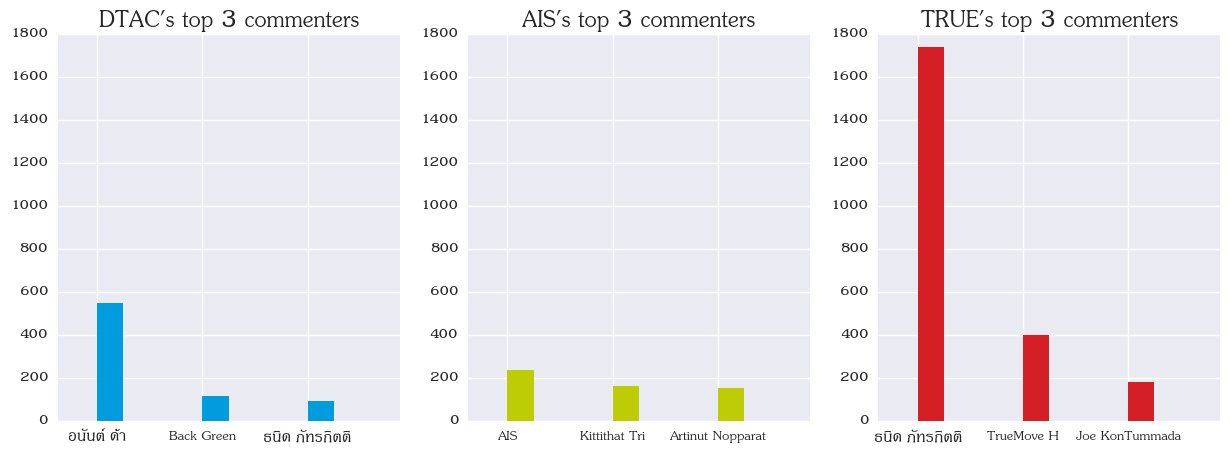

In [6]:
def topCommenter():
    colors = ['#019CDE','#BCCD05','#D51F26']
    fig,ax = plt.subplots(1,3,figsize=(15,5))
    for i,service in enumerate(['DTAC','AIS','TRUE']):
        topCommenter = commentDf['commenter_name'][commentDf['service']==service].value_counts().head(3)
        ax[i].bar([0.75,2.75,4.75],topCommenter,width=0.5,color=colors[i],edgecolor = "none")
        ax[i].set_xlim((0,6.5))
        ax[i].set_ylim((0,1800))
        ax[i].set_title(service+"'s top 3 commenters",fontsize=25)
        ax[i].set_xticks([0.75,2.75,4.75])
        ax[i].set_xticklabels(topCommenter.index.values)    
    plt.show()
topCommenter()

### Let's focus on คุณ ธนิด ภัทรกิตติ first.
-----------

ธนิด ภัทรกิตติ has 1830 comments.
Sample comment : 
เรียนเจ้าหน้าที่ทรูทุกท่าน เรื่องที่ผมถามในอินบ็อกซ์ มีคำตอบหรือยังครับ
----
หากใครมีปัญหาถูกละเมิดสิทธิ์ โดยการนำเบอร์ไปให้บริษัทใดๆส่งข้อความกวนใจ แจ้งแล้วยังไม่หยุด ร้องเรียนได้ที่ กสทช. โทร 1200 ฟรีครับ
----
เมื่อวานเซเว่นส่งข้อความประชาสัมพันธ์ตามไฟล์แนบ เรื่องข้อความประชาสัมพันธ์ผมเคยร้องเรียนทรูให้ยกเลิกและขออนุญาติทุกครั้งที่ส่ง คุณอรอุมาตอบว่ายกเลิกแล้ว แต่ไม่มีการแสดงความรับผิดชอบ ไม่ทำหนังสือขอโทษลูกค้า ใครๆก็รูว่าเซเว่นกะทรูเป็นของตระกูลเจียรวนนท์ คุณอรอุมาไม่รับผิดชอบ จึงแจ้งคณะกรรมการ กสทช. ให้ช่วยส่งเอกสารแจ้งเจ้าของเซเว่นและทรู จะจัดการอย่างไรกับคุณอรอุมา สุขขาว ที่ยกเลิกข้อความให้ไม่หมด ยังคงมีข้อความของบริษัทในตระกูลเจียรวนนท์ส่งอยู่ครับ คุณอรอุมาครับช่วยตอบอีเมลล์สาขาซีคอนบางแคด้วยนะ
----
เรียนคณะกรรมการ กสทช.
วันนี้ ทรูส่งข้อความให้ผมอีกครับ ที่เบอร์ 09399629** สาเหตุที่ผมไม่ยุติข้อร้องเรียนเพราะทรูยังส่งข้อความประชาสัมพันธ์ในระหว่างมีเรื่องร้องเรียน เรื่องนี้ผมแจ้ง คณะกรรมการ กสทช. เมื่อเดือนกรกฏาคม 2559 ในระหว่าง

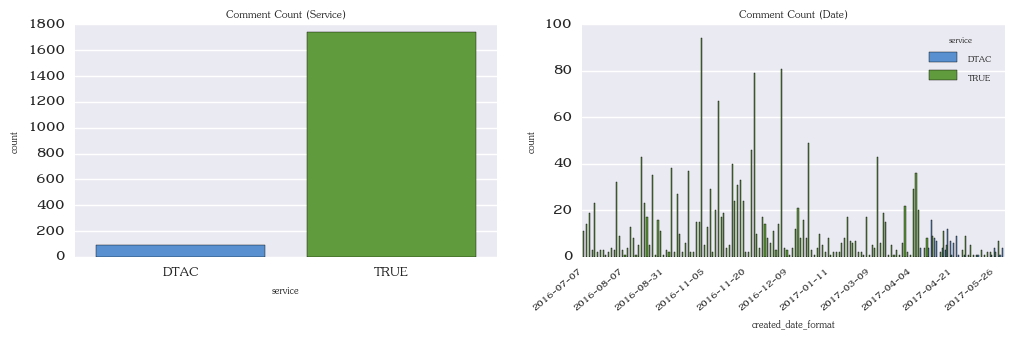

In [14]:
def commentFromUser(name):
    return commentDf[commentDf['commenter_name']==name]
from datetime import datetime

def analyzeUserComment(name):
    color = ['dark sky blue','grass','reddish orange']
    colors = sns.xkcd_palette(color)
    comment = commentFromUser(name)
    print("%s has %d comments."%(name,comment.shape[0]))
    print("Sample comment : ")
    fig, axs = plt.subplots(ncols=2,figsize=(12,3))
    sns.countplot(x="service", data=comment,palette=colors,ax=axs[0])
    axs[0].set_title('Comment Count (Service)')
    sns.countplot(x="created_date_format", data=comment,hue='service',palette=colors,ax=axs[1])
    #axs[1].set_xticks([])
    #axs[1].set_xticklabels([])d = ts
    dateStr = [str(i)[10:20] for i in list(axs[1].get_xticklabels())]
    if(len(dateStr)>=10):
        dateStr = [date if (i%int(len(dateStr)/10))==0  else "" for i,date in enumerate(dateStr) ]
        
    axs[1].set_xticklabels(dateStr, rotation=40, ha="right",size=10)
    axs[1].set_title('Comment Count (Date)')
    for comment in comment[['message','created_date_format','service']].sample(7).sort_values('created_date_format')['message'].values:
        print(comment)
        print("----")
    
    return 
analyzeUserComment('ธนิด ภัทรกิตติ')

As you can see, most of the comment are negative towards TRUE (and little bit to DTac). We can assume that he is very active in using social media given the amount of comment he did.

### Moving on, let's see top commenter from Dtac
--------

อนันต์ ด้า has 548 comments.
Sample comment : 
กากมาก
#ย้ำกากมาก :-\
----
ก๊ากกากก๊ากกาก
----
โคตรกากเน็ตหมุนเป็น"ฮูลาฮูบ"เลยมึง
----
ควย
----
ควย ไอ้เหี้ย ควยๆๆๆๆๆๆๆ
----
nan
----
nan
----


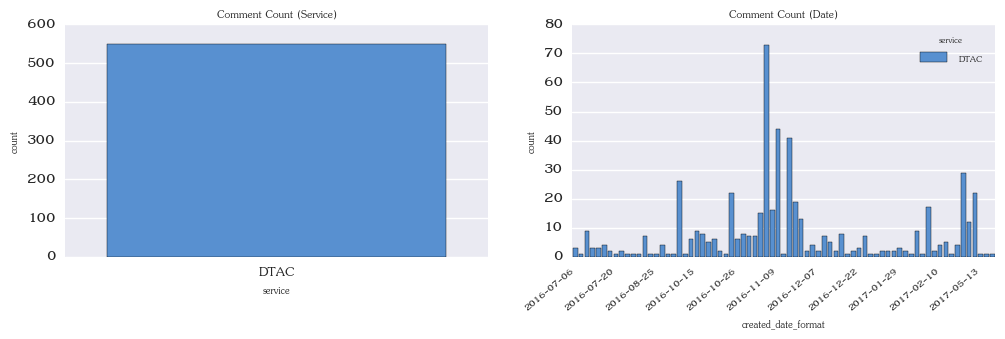

In [18]:
analyzeUserComment('อนันต์ ด้า')

Quite similar to previous commenter.

### Let's look at  คุณ Back Green.
--------------------

Back Green has 139 comments.
Sample comment : 
จะไม่ไหวแล้วนะไอสาด
----
ถุยไอสาด
----
ไอควยกาก ทุก วัน แอดมินกะควายแก้ปัญหาได้ ไป เลี้ยงควาย ไป สาด
----
ถุย
----
เน็ตกากสาดหมา
----
กากดีไอสาด
----
ทำเน็ตให้ดีกว่านี้หน่อยเหอะ
----


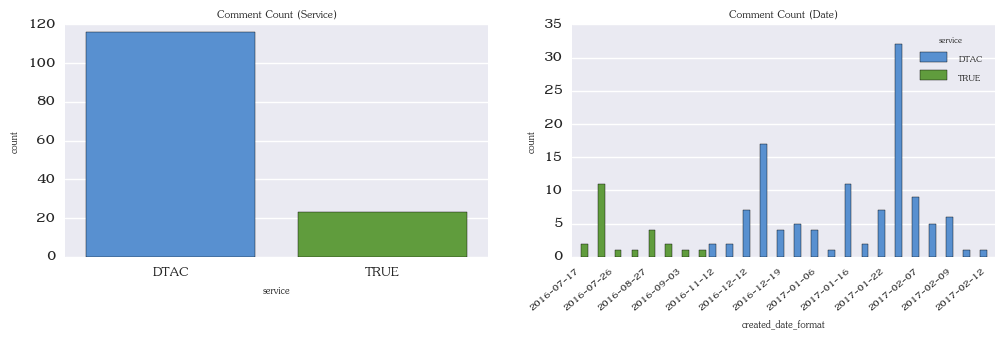

In [19]:
analyzeUserComment('Back Green')

## You can see how the comment shift from True to Dtac. 
-----------------------
This might mean that he/she moved from True to Dtac. From here, we might be able to find churn rate,date just from social media.

TrueMove H has 399 comments.
Sample comment : 
สำหรับโปรโมชั่นแพ็กเกจรองรับทั้ง  4G/3G/EDGE/GPRS นะครับ สามารถใช้งานด้วยกันได้ปกติครับผม
----
ขออภัยในความไม่สะดวกครับ ทางทีมงานยินดีรับเรื่องตรวจสอบให้ครับ รบกวนแจ้งหมายเลขที่ใช้งาน รุ่นเครื่องมือถือ ช่วงวันเวลาและรายละเอียดปัญหาที่พบทาง inbox (ช่องข้อความ) เพื่อดำเนินการตรวจสอบครับ (อย่างไรแล้วแนะนำกดเปิดบริการเน็ทดูก่อนนะครับ โดยกด *902*01# โทรออก)
----
สวัสดีค่ะ คุณ Manussavee Saengow แอดมินยินดีดูแลข้อมูลให้ค่ะ ขอทราบหมายเลขโทรศัพท์ที่ใช้งาน ยอดชำระ และช่องทางการชำระ แจ้งมาทาง inbox ได้เลยนะคะ
----
@เพราะรัก จึงให้ สำหรับแคมเปญ Prepay Smart Value สำหรับกลุ่มลูกค้าทรูมูฟ เอช แบบเติมเงิน ทั้งลูกค้าใหม่ , ลูกค้าปัจจุบัน แบ่งเป็น 2 โปรโมชันค่ะ 
- ลดค่าเครื่อง 5,000 บาทแพ็กเกจ Buffet Net 3,000 บาท Data อินเตอร์เน็ตไม่อั้น (ความเร็วคงที่ 4 Mbps) นาน 8 เดือน
- ลดค่าเครื่อง 3,000 บาท แพ็กเกจ Buffet Net 2,000 บาท Data อินเตอร์เน็ตไม่อั้น (ความเร็วคงที่ 4 Mbps) นาน 5 เดือน
ไม่มีสัญญาใช้งาน หากสนใจสามารถติดต่อทรูช้อปทุกสาขานะคะ.
หากสนใจเครื่องร

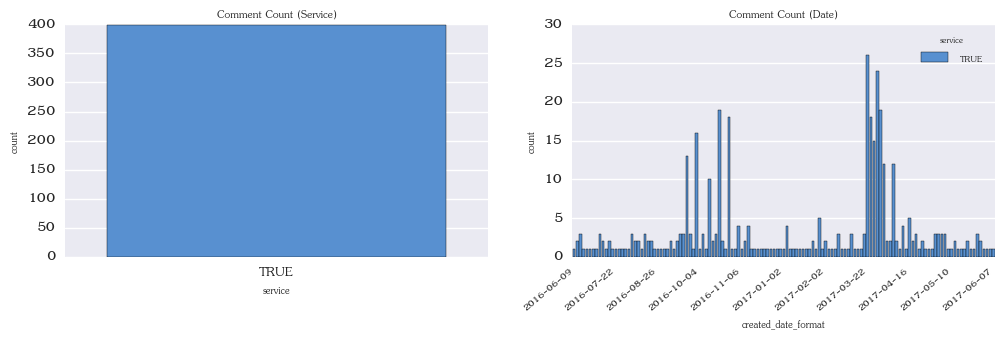

In [23]:
analyzeUserComment('TrueMove H')

AIS has 237 comments.
Sample comment : 
ปัจจุบันแอดมิน ส่งสอบถามเพิ่มเติมให้ คุณFullbest Lookpudee   อยู่นะครับ ทราบข้อมูลจะมาอัพเดทให้ทราบครับ
----
สามารถรอรับชมผ่านทาง  AIS Line Official โดยคลิกลิงก์นี้จากมือถือได้เลยครับ --> http://line.me/ti/p/@aisofficialline
----
คุณ Pandan Usung สามารถดูรายละเอียดเพิ่มเติมที่ลิงก์นี้ครับ  http://www.flashfly.net/wp/?p=157723
----
สวัสดีครับคุณ Plangpin Natthawadee  ตรวจสอบพบว่ามีเจ้าหน้าที่ดูแลทาง inbox แล้วนะครับ
----
ประกาศรายชื่อผู้โชคดีจากกิจกรรม จ่ายบิล กินไอติมฟรี! กับ eService
ของรางวัล : Gift Voucher Swensen’s มูลค่า 50 บาท
คลิก http://bit.ly/2hKhpxg
----
ตรวจสอบรายชื่อผู้โชคดีได้ที่นี่เลยคร้าบบ >> http://bit.ly/2lpoQtf
----
ประกาศรายชื่อผู้โชคดี จากกิจกรรม  AIS SUPER WiFi  แอดต้องขออภัยที่ประกาศล่าช้าด้วยนะครับ เพื่อนๆ สามารถตรวจสอบรายชื่อได้ที่นี่เลยคร้าบ >> http://bit.ly/2qGlG6Q
----


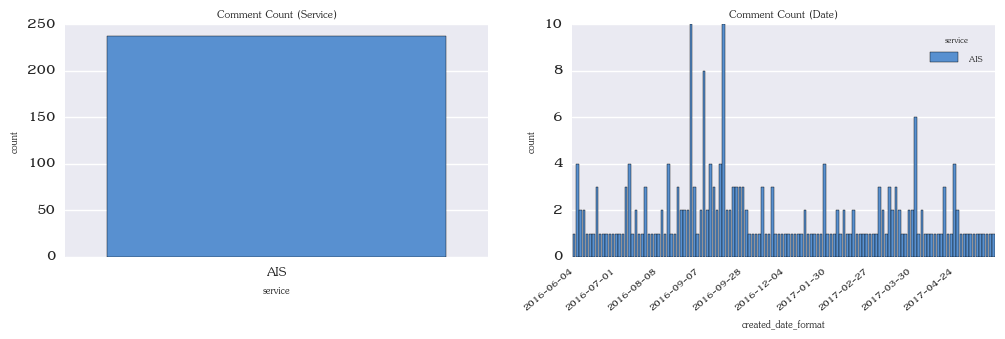

In [24]:
analyzeUserComment('AIS')

dtac has 31 comments.
Sample comment : 
เลือกเบอร์สวยที่ใช่สำหรับคุณ เบอร์ตอง เบอร์เรียง เบอร์คู่ เบอร์สลับ
คลิกเลย! http://bit.ly/nicenumber_freud_fb
#dtacnicenumber
----
เน็ตแรง...แต่บางทีเล่นๆอยู่เน็ตกลับช้าลง ที่ช้าอาจไม่ใช่เพราะเน็ตเวิร์ค แต่เป็นไปตามกฎ FUP *  ซึ่งสามารถตรวจสอบได้ด้วยตนเอง 
คลิก! http://bit.ly/FUP_fb_1
----
เน็ตแรง...แต่บางทีเล่นๆอยู่เน็ตกลับช้าลง ที่ช้าอาจไม่ใช่เพราะเน็ตเวิร์ค แต่เป็นไปตามกฎ FUP *  ซึ่งสามารถตรวจสอบได้ด้วยตนเอง 
คลิก! http://bit.ly/FUP_fb_2
----
ร่วมสนุกลุ้นรับตั๋วชมคอนเสิร์ต Billboard Cafe Sunday Show by dtac Music Inifinite กับเก่ง-ธชย ได้ที่นี่ 😉https://web.facebook.com/dtac/photos/a.182651037068.168530.182638887068/10155625247092069/?type=3
----
ขออภัยในความไม่สะดวกค่ะ คุณ Arpatsara Jailungga น้องฟ้า รบกวน ขอทราบรายละเอียดปัญหาที่พบเพิ่มเติม
@ เบอร์โทร : 
@ พื้นที่ใช้งาน บ้านเลขที่ หมู่บ้าน เขต แขวง จังหวัด : 
แจ้งเข้ามาได้ทาง inbox (กล่องข้อความ) พร้อมกับแนบ link นี้มาด้วยนะคะ
----
น้องฟ้า รบกวนคุณ เอกชัย เขียวสอาด แจ้งรายละเอียดปัญหาที่พบเพ

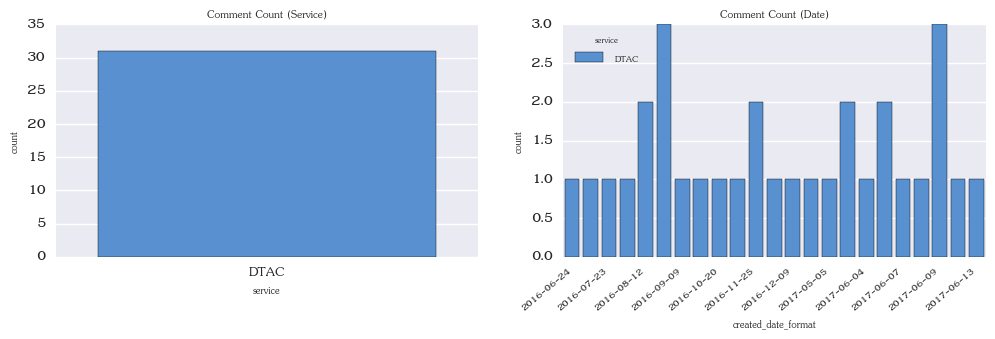

In [21]:
analyzeUserComment('dtac')

Joe KonTummada has 182 comments.
Sample comment : 
น่าจะประมาณเดือน5   แต่วันไหนไปไล่เช็คเอา
----
ผลเป็นยังไงบ้าง  เงียบเหมือนเป่าสากเลย
----
https://m.youtube.com/watch?v=MRgk_YreX9A
----
ในเมื่อทางทรูตัดสิ้นใจแบบนั้นก็ไม่ต้องโทรมา  ผมจะไปยกเลิก  และต้องการไฟล์เสียงนั้นด้วย  จะเอาเรื่องพนักงานและค่ายทรู  ที่โกหกลูกค้า  จบ
----
แบบนี้ก็คงยกเลิกก่อน   ได้คำตอบเมื่อไหร่หรือดีพอค่อยย้ายกลับมา
----
โกหกและกลับคำแบบนี้  มันเลยจุดที่ตะเครียละ
----
ปัญหามีตั้งแต่ปลายเดือนที่แล้ว  เรื่องพนักงานบอกโปรผมไม่มีวันหมดอายุ   ก็ยังตามให้ไม่ได้   วันที่13  บอกไฟล์เสียงมาละผมก็ไปฟัง แต่ไม่ใช่  เร็วๆนี้คุณ กัณหา โทรมาวันที่18  บอกขอ3 วันจะส่งไฟล์ใหม่มาที่ช๊อปทรู พาราไดส์  ก็เงียบหาย  พอเมื่อวานนี้วันที่ 23ช่วงเช้า  คุณ ปิยะ ก็โทรมาคุยอยู่นาน  ก็บอกขอเวลา3 วันจะส่งไฟล์เสียงไปให้   พอช่วงเย็นโทรมาหาอีกรอบคุยโน่น นั่น  ผมบอกเอาเป็นว่ารีบส่งไฟล์มาให้ผม  แต่คุณ ปิยะ กลับบอกว่าไม่มีนะโยบายส่งไฟล์เสียงให้ฟัง   ผมเลยบอกว่าเคยส่งมาให้ฟังละแต่มันไม่ใช่ไฟล์เสียงที่คุยกับคุณปิยะ  คุณ ปิยะ  ไม่เชื่อ  ผมเลยเดินไปที่ช

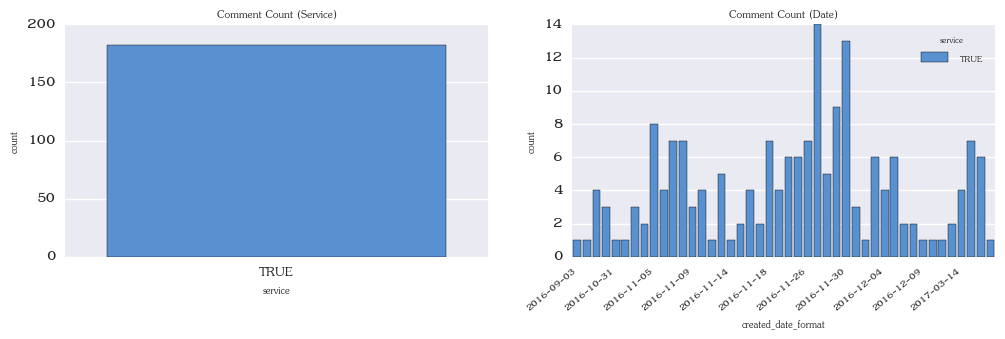

In [25]:
analyzeUserComment('Joe KonTummada')

Kawee Loysong has 14 comments.
Sample comment : 
ของผม เลข 6 เย้ๆๆ งามๆเลย ครับ
----
แค่อยากจะรู้ ผมเคยใช่แอร์การ์ด ต่อเน็ตเข้าคอมฯ ดูทีวีได้สะบายๆเป็นหลาย ชม. หมายถึงตอนที่ยังเป็น ระบบ 2 จีอยู่นะ เดี๋ยวนี้เปลี่ยนมาเป็น ระบบ 3-4 จี ขอถามเถอะ แม้แต่สมาร์ทโฟน มีเน็ตอยู่ เป็นกิ๊ก ดูทีวียังไม่ได้ ตกลงนี่มันพัฒนาแบบใหนกัน บอกตามตรง รุ่นตอนที่ยังใช้ 2 จี เน็ตนี่โคตรแรงเลย เดี๋ยวนี้ 3-4 จี กากมากๆ
----
ไอประเภท ความเร็วแบบไม่จำกัด ผมไม่เชื่อหรอก ผมเคยสมัคร แบบ ความเร็วบอกว่า 512 kbps แต่ปล่อยมาเท่าไร เต็มที่ 100 ยังไม่ถึงเลย ดูทีวียังไม่ได้ และอย่าบอกนะ ว่าขึ้นอยู่กับช่วงเวลาที่คนใช้มากหรือน้อย ผมใช้ตอน 01-02.00 น.และในศูนย์การค้า นะ ไม่ใช่ใช้หลังเขาหลังดอย จะมีใครมาแย่งใช้ ผมเลิกเลย ไอแบบความเร็ว ชนิดนี้ แต่พอเปลี่ยนมาใช้แบบกำหนด กิ๊กไบท์ ยังจะดีเสียกว่า ดูทีวี ได้สะบาย ราคาไม่ต่างกันแต่ที่สงสัย คือ ลูกค้ายิ่งเก่า โปรฯดีๆ กลับยิ่งไม่มี เห็นมีแต่เน้นเปิดเบอร์ใหม่ และบางโปรฯสมัครก็ยาก เงื่อนไขเยอะ แม้จะมียอดเงินพอก็สมัครไม่ได้ และหรือบางโปรฯเคยใช้ แต่พอลองเปลี่ยนโปรฯตัวอื่น จะกลับมาใช้ตัวเดิมซ

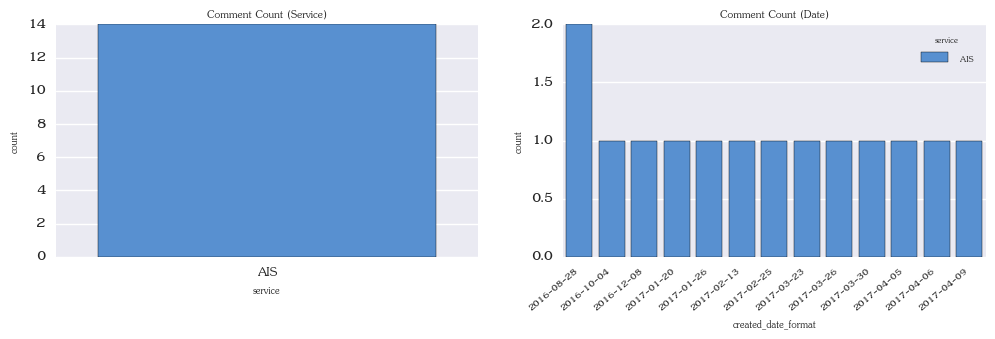

In [27]:
#Randomly select one person to analyze
sampleComment = commentDf['commenter_name'].value_counts().head(750).sample(1)
analyzeUserComment(sampleComment.index[0])

## Here is some interesting case found using the sampling function
----

Pattaraphong Sawadiruttana has 38 comments.
Sample comment : 
กำลังย้ายค่ายเบอร์เดิมไปดีแทครายเดือนแล้วนะ เนตเยอะดี โปรลด 50% นาน12เดือน จาก 1099 บาท เหลือ 549 ได้เนต 40GB เยอะมากๆแถมโทรฟรี 600 นาที คุ้มนะถ้าเปรียบเทียบกับค่ายอื่นๆให้เนตน้อยมากแถมแพงด้วย
----
เดี๋ยวสักพักมีแต่ลูกค้าดีแทคแห่กันมาคอมเมนท์ด่าเพียบเชื่อสิ 555
----
ไอโฟนก็ made in China นะยูว์
----
Beats แพงไปหน่อยเนอะ ระดับเราใช้ JBL เหมาะดีแต่ก็อยากได้รอวันลด 50% นะ
----
พร้อมแพ็กเกจ Buffet Net Plus เพียง 1,000 บาท ได้โปรไรครับแอดมิน
----
ใส่ซิมอื่นได้มั้ยแอด
----
เครื่อง oppo หมดอ่ะเสียดายจะย้ายค่ายสะหน่อย ที่ไหนมีเครื่องบ้างแอดมิน
----


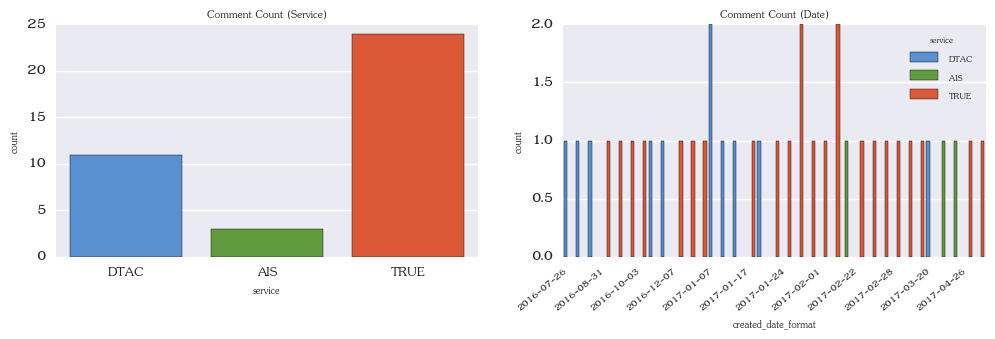

In [28]:
analyzeUserComment('Pattaraphong Sawadiruttana')

In [40]:
for i in commentDf[commentDf['commenter_name']=='Pattaraphong Sawadiruttana'].sort_values('created_date').head(10)['message'].values:
    print(i)
    print("--")

เจ๋งมากกกกกกก คอนเฟิร์ม!!! ฟรีๆๆๆๆค่าเนต ฟังเพลงมีความสุขที่สุดใน3โลกกกกก
--
กำลังย้ายค่ายเบอร์เดิมไปดีแทครายเดือนแล้วนะ เนตเยอะดี โปรลด 50% นาน12เดือน จาก 1099 บาท เหลือ 549 ได้เนต 40GB เยอะมากๆแถมโทรฟรี 600 นาที คุ้มนะถ้าเปรียบเทียบกับค่ายอื่นๆให้เนตน้อยมากแถมแพงด้วย
--
เนตไม่ค่อยดีเลยอ่ะ ขึ้น R ตลอด ทั้งที่ทำงานและที่บ้าน ดีนะลองซื้อซิมเติมเงินมาลองสัญญาณก่อนที่จะย้ายค่ายไม่งั้นซวยไปตลอด12รอบบิล
--
เจ้าอื่นๆเค้าเม็กล่ะกี่บาทใครรู้บ้าง
--
ลดสีเดียว สีอื่นๆล่ะ
--
ชื่นชมครับ คนปกติอย่างเราๆบางคนยังทำไม่ได้อย่างนักกีฬาพวกนี้เลย
--
เติมเงิน หรือ รายเดือน เอาดีๆๆๆ คนอ่าน งง กันหมดแล้วแอดมินแก้ไขด่วน!!!!!
--
แปลกใจทำมัยดีแทคโพสต์ทุกครั้งมีแต่ลูกค้ามาด่า ไม่เห็นว่าโพสต์ไหนจะมีลูกค้าดีแทคมาชมสักอัน!!
--
ตอนแรกจะย้ายค่ายจากทรูไปดีแทค สรุปกูไม่ไปล่ะ อ่านจากบรรดาลูกค้าดีแทดที่มาด่ากันกูกลัว 5555
--
Lenovo กับ oppo อันไหนดีกว่า
--


He was first using AIS. Then he is considering to switch to Dtac, but later change his mind and go to True.

------------------


กุญแจชีวิต เข็มทิศหัวใจ has 10 comments.
Sample comment : 
แอดคัฟรบกวนตอบด้วย คือสมัครเน็ตรายเดือน399ไปตั้งแต่วันที่ซื้อเครื่องพร้อมโปรรายเดือนอ่คัฟ วันที่25มิถุนายน       59 นิ่เพิ่งวันที่5 กรกฎาคม เองทำไมใบบิลแจ้งค่างวดมาแล้วอ่คัฟยังไม่ถึงเดือนเลย แถมไม่ได้ใช้นอกจากโทรอย่างเดียวก็ยังไม่ถึงโทรฟรีทุกเครือข่าย150นาทีเลยแต่ในใบบิลนี่แจ้งราคาเกินจิงไปเยอะมากนิ่แค่เดือนแรกนะคัฟยังขนาดนิ่เลยแล้วเดือนต่อไปไม่ต้องจ่ายเยอะกว่านิ่หรอแถมเน็ตก็กากมากแล้วแบบนิ่จะให้สมัครเน็ตรายเดือนไปเพื่ออะไร
----
แอดทำไมใช้รายเดือนเน็ต399เมื่อวันที่่ 25มิถุนายน 59 เนิ่ย ทำไมวันนิ่เพิ่งวันที่5 กรกฎาคม ใบบิลแจ้งค่างวดมาแล้วอ่ ทั้งที่ยังไม่คบเดือนเลยและไม่ค่อยได้ใช้ด้วยทำไมยอดเกินตั้งเยอะอ่
----
เหี้ยเถอะกูส่งแชทไปถาม2วันแหละไม่ตอบเอาไงวะกูตั้งวงเงินไม่เกิน500ไว้แต่นี่อะไรรายเดือนกุปาเข้าไปเกือบ600โกงหน้าด้านๆเลยนะมึงดีแทครอให้กูหมดความอดทนก่อนกูย้ายค่ายหนีแน่สันญานก็ห่วยแตกสิ้นดี
----
ไม่เอาแล้วห่วยแตกสิ้นดีสัสซื้อS1มายังไม่ถึงเดือนพังแล้วอ่สัสซ่อมก็ไม่ได้ทั้งที่รักษาอย่างดี
----
ไม่ต้องรอถึงปีหรอกสัสเพิ่งซื้อมาไม

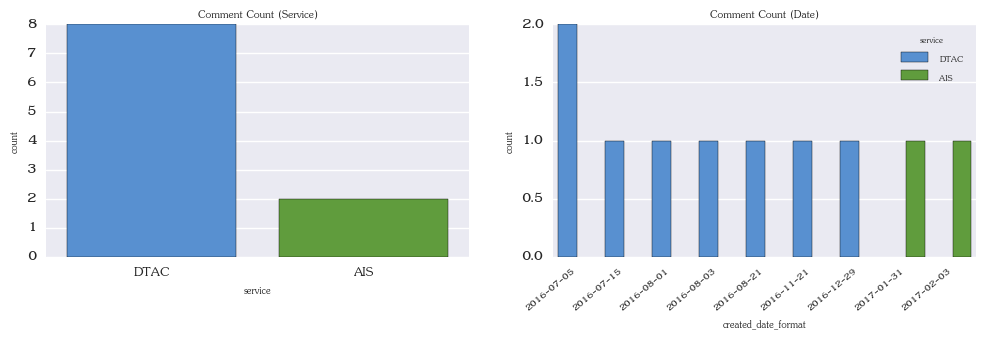

In [30]:
analyzeUserComment('กุญแจชีวิต เข็มทิศหัวใจ')

## He is not happy with dtac facbook admin.
------------

In [39]:
for i in commentDf[commentDf['commenter_name']=='กุญแจชีวิต เข็มทิศหัวใจ'].sort_values('created_date')['message'].values:
    print(i)
    print("--")

แอดทำไมใช้รายเดือนเน็ต399เมื่อวันที่่ 25มิถุนายน 59 เนิ่ย ทำไมวันนิ่เพิ่งวันที่5 กรกฎาคม ใบบิลแจ้งค่างวดมาแล้วอ่ ทั้งที่ยังไม่คบเดือนเลยและไม่ค่อยได้ใช้ด้วยทำไมยอดเกินตั้งเยอะอ่
--
แอดคัฟรบกวนตอบด้วย คือสมัครเน็ตรายเดือน399ไปตั้งแต่วันที่ซื้อเครื่องพร้อมโปรรายเดือนอ่คัฟ วันที่25มิถุนายน       59 นิ่เพิ่งวันที่5 กรกฎาคม เองทำไมใบบิลแจ้งค่างวดมาแล้วอ่คัฟยังไม่ถึงเดือนเลย แถมไม่ได้ใช้นอกจากโทรอย่างเดียวก็ยังไม่ถึงโทรฟรีทุกเครือข่าย150นาทีเลยแต่ในใบบิลนี่แจ้งราคาเกินจิงไปเยอะมากนิ่แค่เดือนแรกนะคัฟยังขนาดนิ่เลยแล้วเดือนต่อไปไม่ต้องจ่ายเยอะกว่านิ่หรอแถมเน็ตก็กากมากแล้วแบบนิ่จะให้สมัครเน็ตรายเดือนไปเพื่ออะไร
--
คือไม่รุ้กุจะสมัครเนตรายเดือนเพื่อไร399เล่นห่าไรก็ไม่ได้สันญานโทรสัพก็ไม่มีขึ้นทีละขีดเวลาเล่นอะไรโครตเสียอารมณ์หมุนติ้วๆอยุ่นั่นแหละควยขนาดอยู่ในกรุงเทพนะเนี่ยจนกูต้องสมัครไวไฟที่หอพักกูเล่นคุ้มซะยิ่งกว่าคุ้ม50บาทเองแต่ของมึงเดือนนึงเกือบ400แต่เล่นเหี้ยไรไม่ได้เลยไอ้ค่ายห่วย
--
เหี้ยเถอะกูส่งแชทไปถาม2วันแหละไม่ตอบเอาไงวะกูตั้งวงเงินไม่เกิน500ไว้แต่นี่อะไรรายเดือนกุปาเข้าไปเกือบ600โกงห

## Here he is complaining about bad signal. If we have social media listener, we might prevent these group of customer from leaving.
------------

In [41]:
for i in commentDf[commentDf['commenter_name']=='Tanawat Setthakorn'].sort_values('created_date')['message'].values:
    print(i)
    print("--")

ทำไมมันเนตช้ามากเลยอะครับ ตอนนี้ผมใช้โปร 1299 go no limit อยู่
--
ช่วยมาตอบผมหน่อยครับ
--
ผมจ่ายไม่ใช่ถูกๆนะครับ 1299!!!
--
ไม่งั้นย้ายค่ายแน่!!
--
ทำไมอะ ผมอุตส่าห์ย้ายค่ายมาหาคุณ แต่คุณทำกับผมแบบนี้ได้ยังไง ผมใช้โปร 1299 go no limit ผมดูหนังที่ 720 กระตุก ผมก็ไม่ว่าอะไร แต่พอผมลดคุณภาพลงเหลือ 480 ยังจะกระตุกอีก มันเกินไปแล้วนะ ผมขอร้องและ ช่วยพัฒนาจริงๆเถอะ  ผมอุตส่าห์เอาเครือข่ายคุณไปโปรโมทให้เพื่อนๆใช้กัน แต่เจอแบบนี้คงไม่กล้าอีกแล้ว
--
ทำไมอะ ผมอุตส่าห์ย้ายค่ายมาหาคุณ แต่คุณทำกับผมแบบนี้ได้ยังไง ผมใช้โปร 1299 go no limit ผมดูหนังที่ 720 กระตุก ผมก็ไม่ว่าอะไร แต่พอผมลดคุณภาพลงเหลือ 480 ยังจะกระตุกอีก มันเกินไปแล้วนะ ผมขอร้องและ ช่วยพัฒนาจริงๆเถอะ  ผมอุตส่าห์เอาเครือข่ายคุณไปโปรโมทให้เพื่อนๆใช้กัน แต่เจอแบบนี้คงไม่กล้าอีกแล้ว
--
ทำไมอะ ผมอุตส่าห์ย้ายค่ายมาหาคุณ แต่คุณทำกับผมแบบนี้ได้ยังไง ผมใช้โปร 1299 go no limit ผมดูหนังที่ 720 กระตุก ผมก็ไม่ว่าอะไร แต่พอผมลดคุณภาพลงเหลือ 480 ยังจะกระตุกอีก มันเกินไปแล้วนะ ผมขอร้องและ ช่วยพัฒนาจริงๆเถอะ  ผมอุตส่าห์เอาเครือข่ายคุณไปโปรโมทให้เพื่อนๆ

In [44]:
for i in commentDf[commentDf['commenter_name']=='ผ่านมา แค่ให้จำ'].sort_values('created_date')['message'].values:
    print(i)
    print("--")

ลูกค้าเก่า คุณไม่ดูแล ใช้มาเกือบ10ปี โปรแพง พอย้ายค่ายปั๊ป เพิ่งจะมาบอกโปรลด50% มันน่ามั้ยล่ะ
--
ไหนบอกเต็มสปีด 3G จะหมดก่อน 30 วันอยู่เหรอค่ะ
--
มันยกเลิกสัญญาทาสไม่ได้ติคับ จรดปักกาเซ็นสัญญา12เดือน ตอนจะเอาลูกค้านี่ได้ทุกเรื่องคับ พอเกิดไม่พอใจมากะทำอะไรไม่ได้แล้ว ตอบสั้นๆง่าย เหมือนกันทุกค่ายคับ
--
อยากได้สักเครื่องทำงัย คับเห็นบอกของหมด ไหนๆจะจัดทั้งทีให้มันทั่วถึงหน่อยคับ
--
สำหรับท่านๆ ที่ได้มาแล้ว รีวิวให้ดูหน่อยคับถ้า 4 G แรงจิงเครื่องดีจิง ก็คงช่วยกันอุดหนุน หรือถ้าตรงข้ามจะได้ช่วยคนถัดไป ขอบคุณครับ
--
ห่วยมากๆๆๆๆๆๆๆๆๆ
--
รายงานปันหาไปก้อเหมือนเดิม..ไม่มีอะรัยดีขึ้น..โทรไปก้อแล้วมีแต่พุดจะเช็คให้เเล้วก้อเงียบไม่โทรกับมาบอกว่ายังงัยนี้หรอเอาใจลุกค้าหรือแค่หวังเงิน..จะเอาเงินก้อหัดเช็ดสันยานให้มันดีๆๆหน่อย..พนักงานแนะนำอาทิตย์ล่ะ89บาทความเร็วเน็ตไม่ลดสปีดแต่พอสมัคหมุดยันดาวอังคารคร่าาาคืออะรัยค่ะไกนบอกไม่ลดสปีดงัย..คือ..😠😠😠😠😠😠😠
--
4g ในเมืองมีสัญญาณแค่เนี้ยดูเอา
--
แดกไป เกือบพันเลยเดือนนี้จะเลิกชั้ยจิงๆแระย้ายค่ายแม่งเลย
--
ใช้เน็ตรายเดือนเล่นได้เดือนเดียวไม่ค้างค่างวดสักเดือนแ

## And much more. 
-------------------
We can know users story from these comments. Imagine combine with machine learning model that can detect whether the comment is unhappy or not. We can prevent a large portion of user from leaving.